<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

WHO = 7
SONG = 2
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

13:03:05 INFO << load arm CSV.
13:03:05 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 4, 2)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 4, 2)) 
            
    return pfs

In [5]:
pfs = gogo(WHO, SONG, TRAIN_ORDER)

100%|██████████| 3/3 [00:58<00:00, 19.37s/it]


13:04:32 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
13:04:32 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


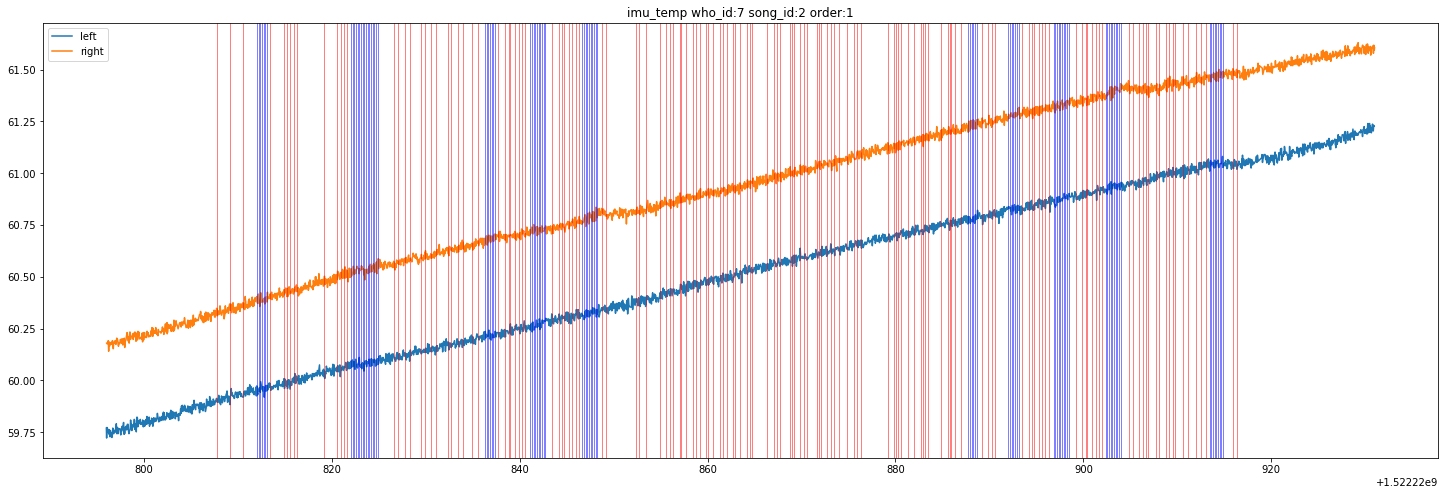

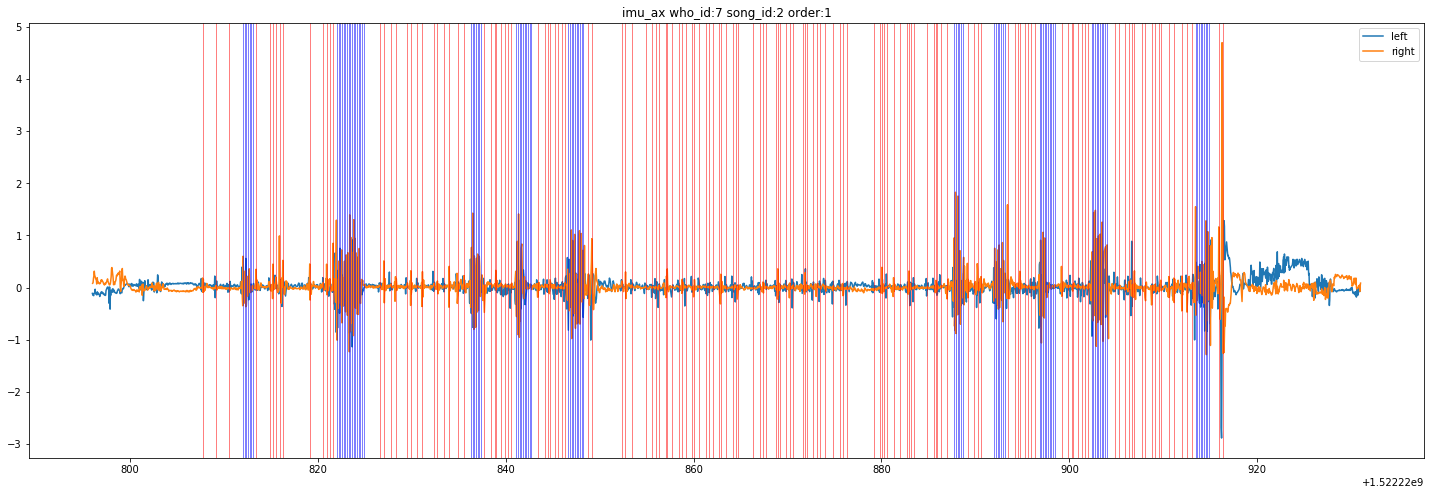

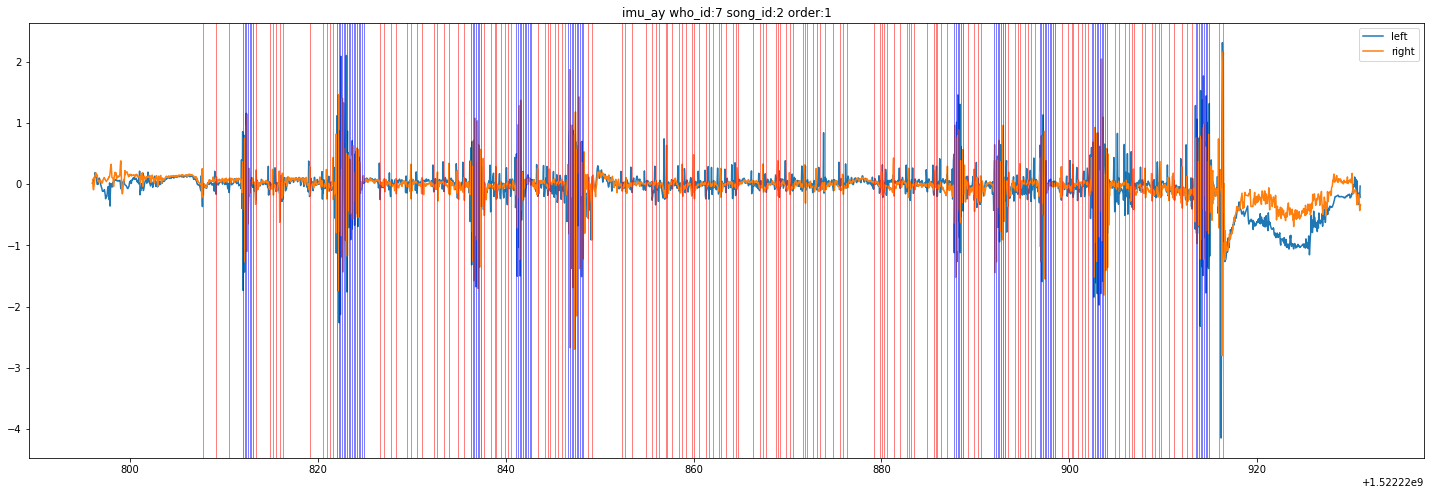

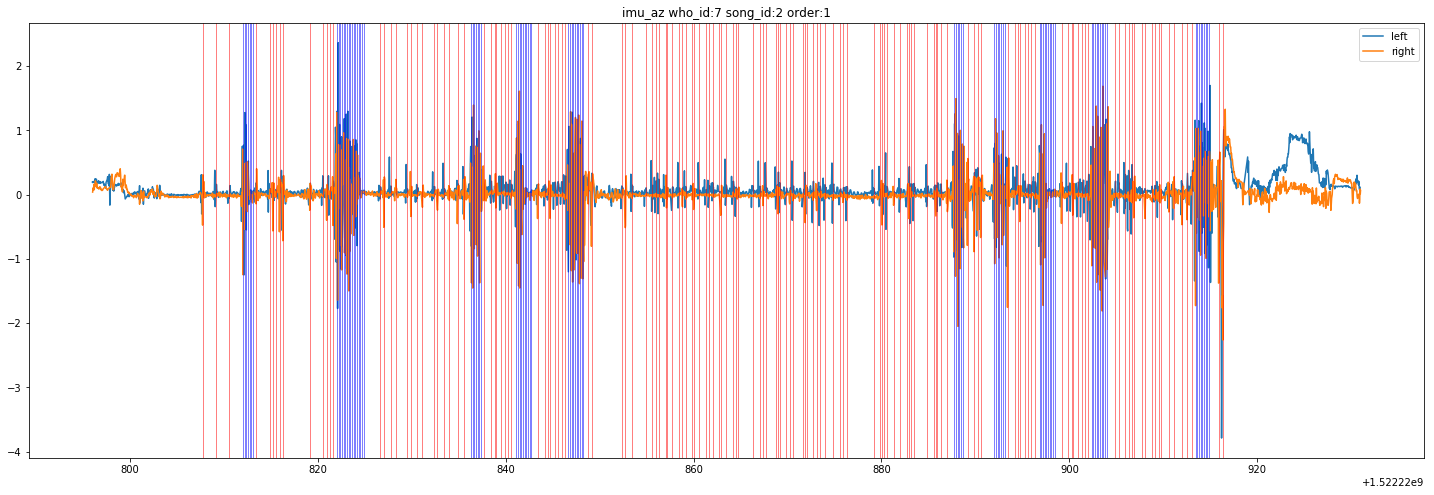

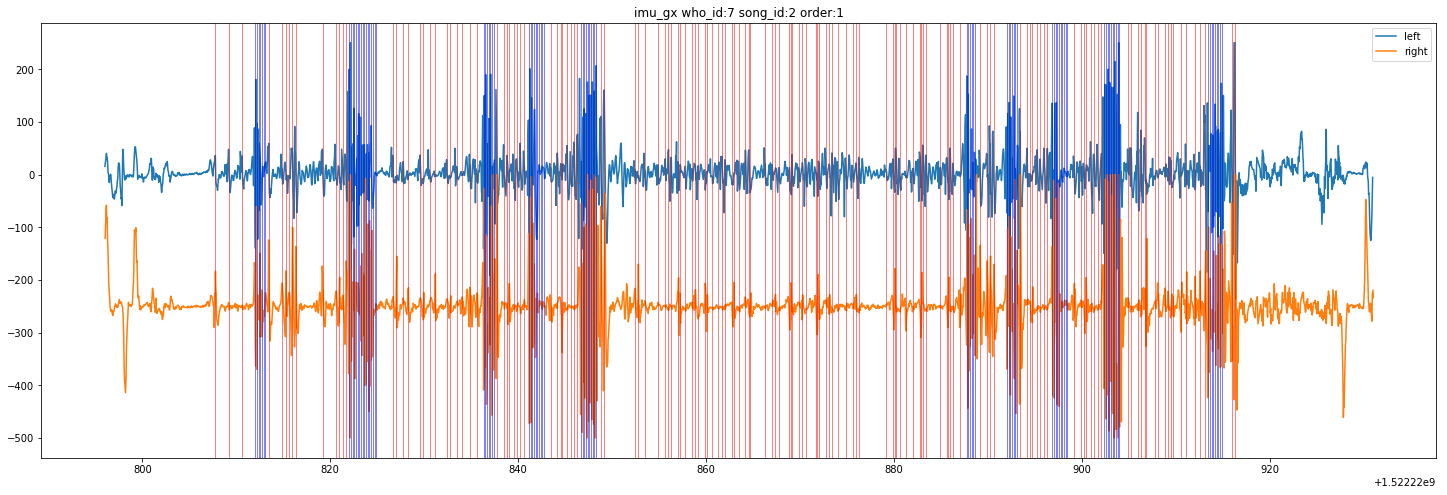

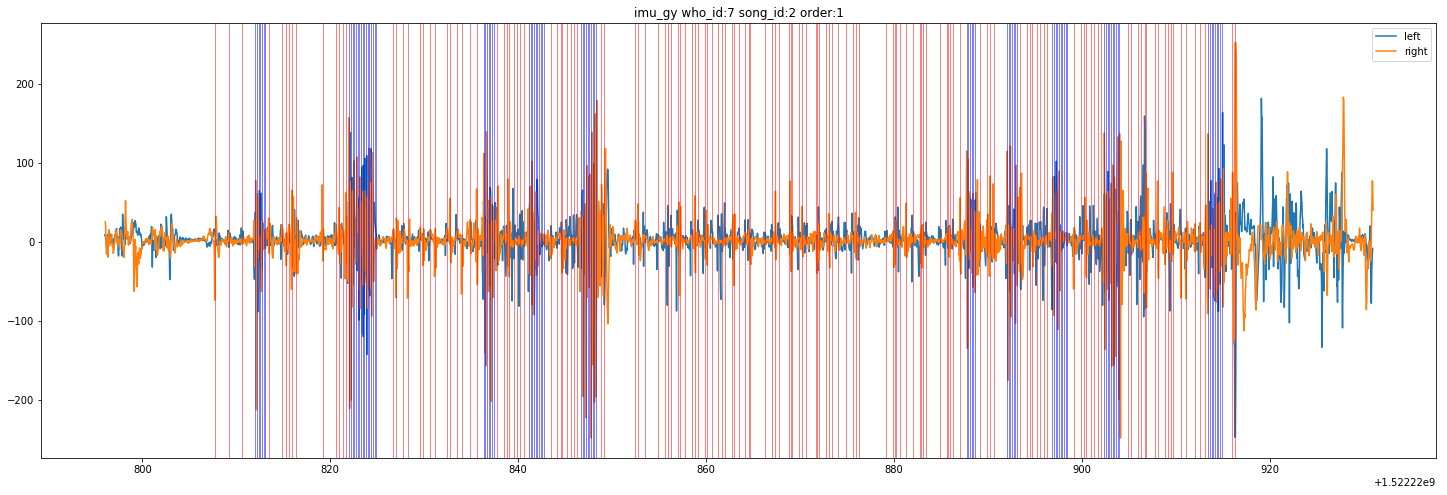

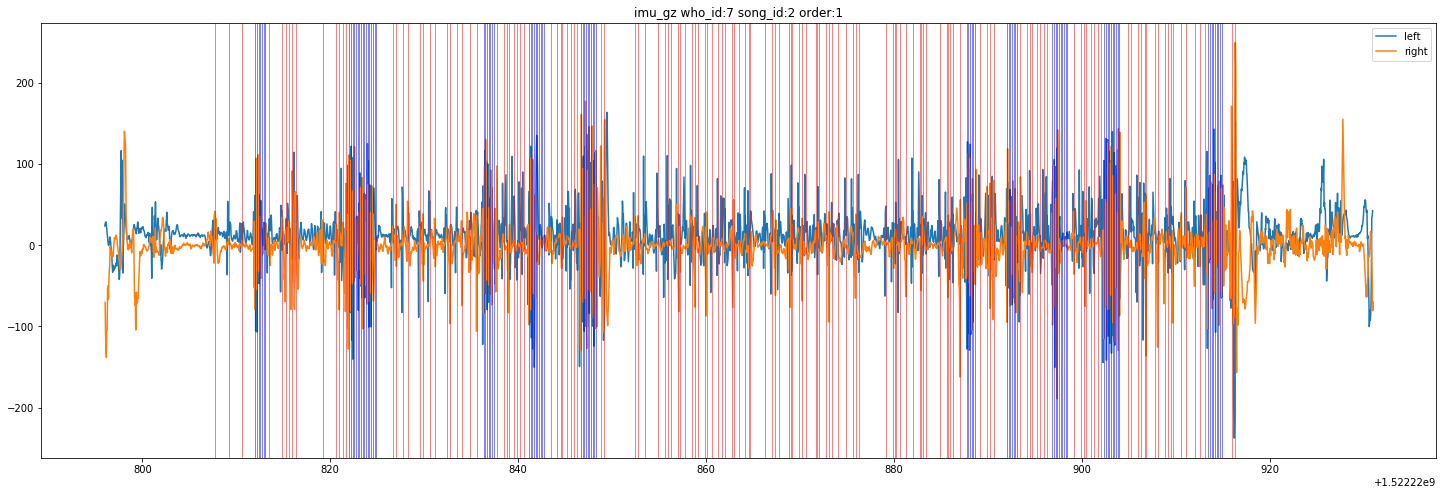

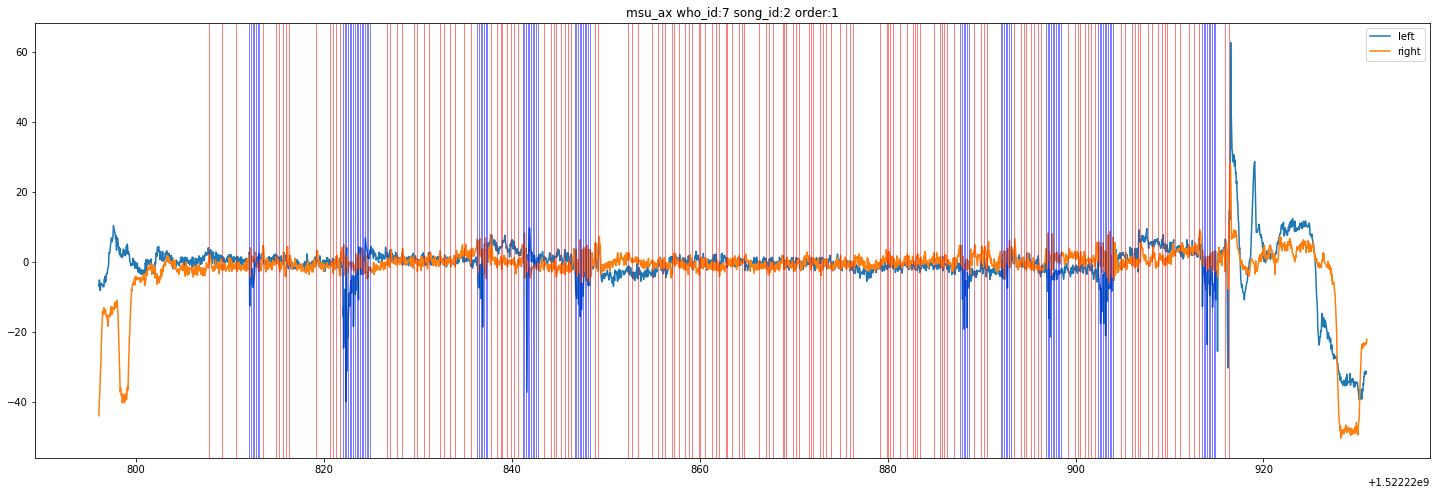

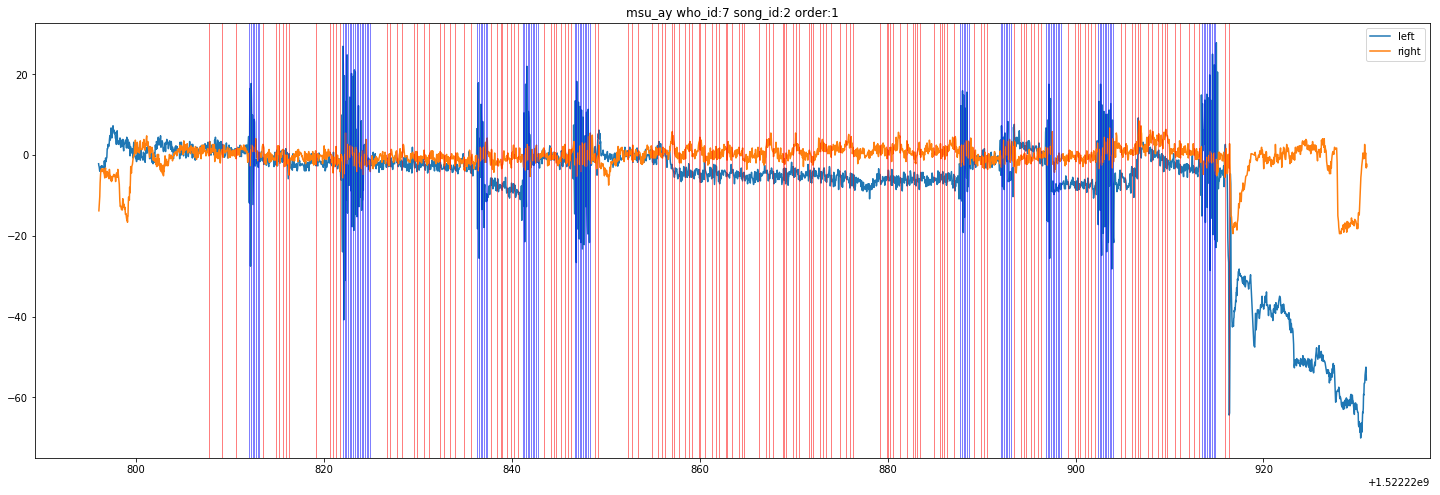

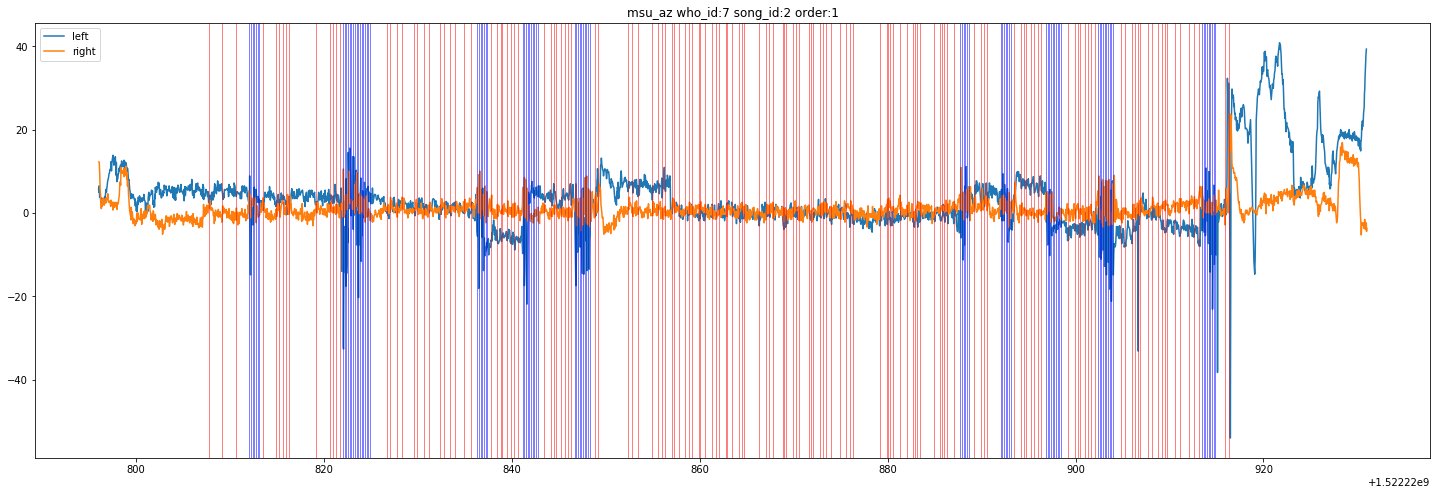

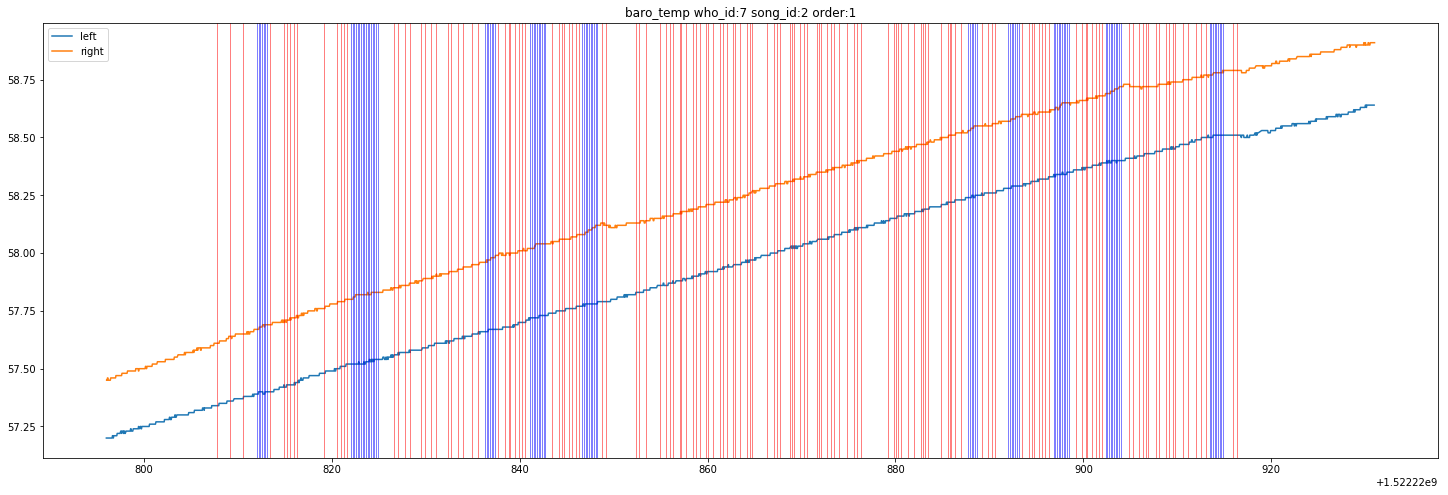

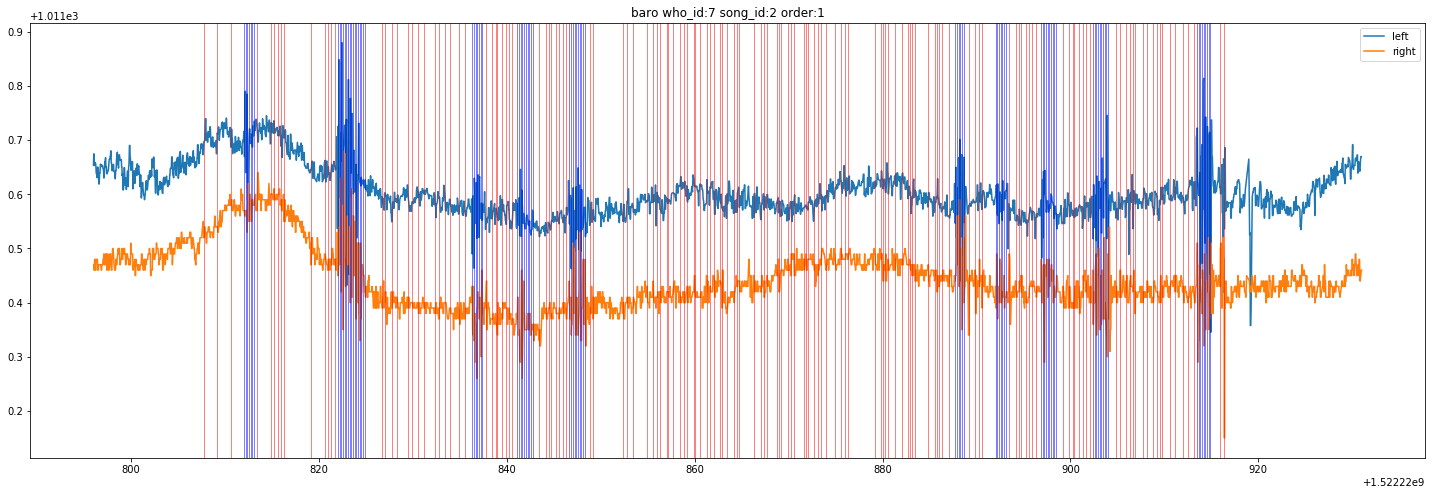

In [6]:
pfs[0].plot_global_event()

In [7]:
# for i in range(len(pfs)):
#     print(pfs[i].primitive_df)
pfs[2].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,L_MGMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,0.272178,0.000060,0.466000,247.757229,1.417884,252.355000,0.074140,61385.062644,0.274734,247.761081,...,0.285714,0.285714,0.142857,0.285714,0.480321,0.883219,0.413956,-0.531850,-0.449253,-0.219393
1,0.255119,0.000062,0.434500,247.252581,2.938581,255.549000,0.065148,61136.777289,0.258526,247.055787,...,0.250000,0.250000,0.250000,0.250000,0.827816,0.955587,0.649352,-0.395507,-0.649767,-0.437707
2,0.253855,0.000026,0.433250,247.995909,0.314634,255.276250,0.064468,61502.285730,0.254372,248.072409,...,0.250000,0.500000,0.250000,0.500000,0.919296,0.950794,0.994861,0.009730,-0.951013,0.294307
3,0.251657,0.000030,0.429500,247.553711,2.703403,255.299000,0.063362,61285.543119,0.250602,247.702354,...,0.250000,0.250000,0.250000,0.250000,0.913939,0.934573,0.926059,-0.960949,-0.934379,0.855688
4,0.245244,0.000041,0.419333,245.296405,6.737057,251.742667,0.060185,60177.063546,0.243288,245.282536,...,0.250000,0.500000,0.250000,0.500000,-0.935382,-0.437394,0.216386,-0.699384,0.032280,0.121726
5,0.215386,0.000571,0.359333,221.941434,109.195364,233.618833,0.046962,49367.195553,0.218188,223.034994,...,0.250000,0.250000,0.250000,0.250000,0.204687,0.762485,0.705993,0.875343,-0.943553,-0.984965
6,0.214090,0.001119,0.359167,187.544361,33.754652,215.385167,0.046954,35206.641889,0.218552,185.721316,...,0.333333,0.333333,0.333333,0.333333,-0.936502,-0.929480,0.999809,-0.991582,0.984700,-0.998974
7,0.279407,0.003059,0.404167,223.563607,369.661077,257.270333,0.081127,50350.347373,0.258891,213.555525,...,0.200000,0.200000,0.200000,0.200000,0.127713,0.979310,-0.057948,0.838401,-0.957017,-0.918046
8,0.278526,0.000529,0.436200,268.650233,73.374811,310.941800,0.078105,72246.322415,0.278525,270.496565,...,0.750000,0.250000,0.250000,0.250000,-0.531629,-0.040869,-0.803696,0.879815,-0.575243,-0.873447
9,0.211117,0.000695,0.341750,320.880416,110.477585,408.292500,0.045265,103074.718791,0.204494,325.345278,...,0.500000,0.500000,0.500000,0.500000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

[[-0.03673504 -0.33269763  0.07389176 ... -0.55129426 -0.80455442
  -0.75219079]
 [-0.08489763 -0.33267287  0.01363886 ... -0.3479448  -1.10026831
  -1.08141117]
 [-0.08846743 -0.33312289  0.01124787 ...  0.25644773 -1.5445398
   0.02247607]
 ...
 [ 0.27399314 -0.329349    0.35698474 ...  0.56222698  0.54147991
   0.78964396]
 [ 0.32513637 -0.33099179  0.4048045  ... -0.34369934  1.20398586
  -1.51129389]
 [ 0.29234197 -0.3293852   0.36750509 ...  0.62050896 -0.33247309
  -1.80496529]]


100%|██████████| 609/609 [00:38<00:00, 15.98it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:38<00:00, 15.96it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.         1.        ]
 [0.37634409 0.62365591]]


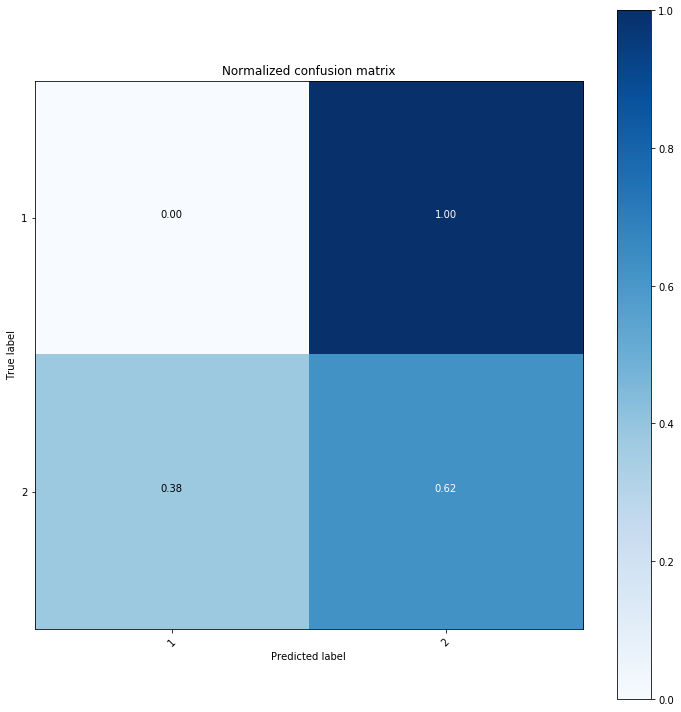

predicting 2 performance


100%|██████████| 609/609 [00:38<00:00, 15.93it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99324324 0.00675676]
 [0.47311828 0.52688172]]


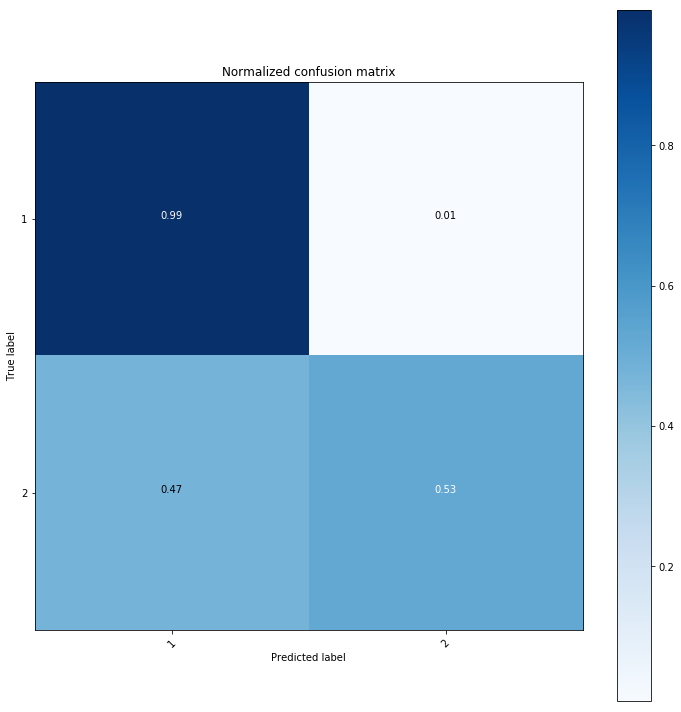

predicting 3 performance


100%|██████████| 609/609 [00:38<00:00, 15.97it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.06451613 0.93548387]]


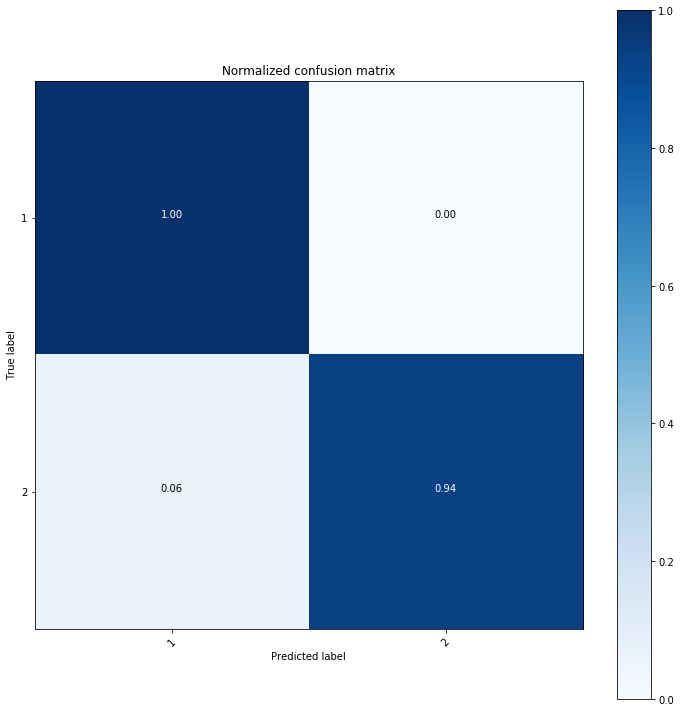

[[-0.03673504 -0.33269763  0.07389176 ... -0.55129426 -0.80455442
  -0.75219079]
 [-0.08489763 -0.33267287  0.01363886 ... -0.3479448  -1.10026831
  -1.08141117]
 [-0.08846743 -0.33312289  0.01124787 ...  0.25644773 -1.5445398
   0.02247607]
 ...
 [ 0.27399314 -0.329349    0.35698474 ...  0.56222698  0.54147991
   0.78964396]
 [ 0.32513637 -0.33099179  0.4048045  ... -0.34369934  1.20398586
  -1.51129389]
 [ 0.29234197 -0.3293852   0.36750509 ...  0.62050896 -0.33247309
  -1.80496529]]


100%|██████████| 609/609 [00:38<00:00, 15.98it/s]

let's go centroid=50, C=500.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 609/609 [00:38<00:00, 15.96it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.03378378 0.96621622]
 [0.5483871  0.4516129 ]]


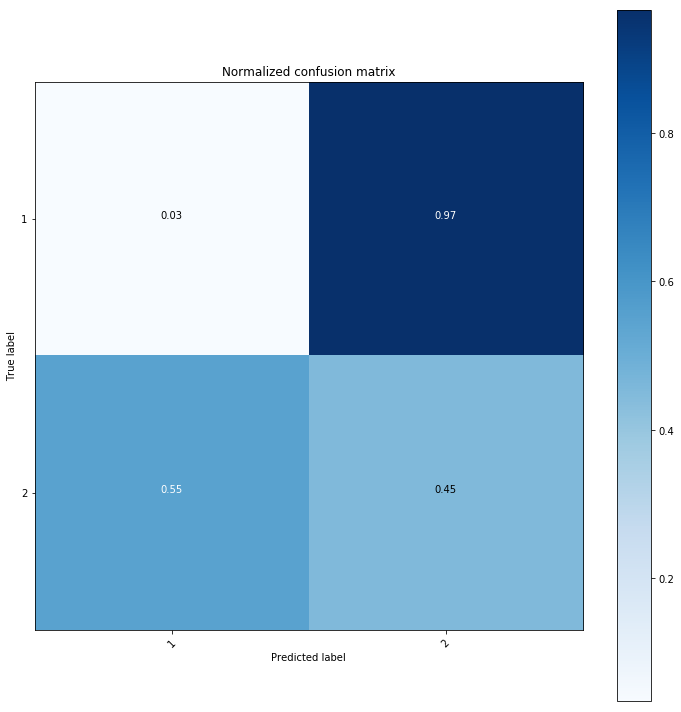

predicting 2 performance


100%|██████████| 609/609 [00:38<00:00, 15.90it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99324324 0.00675676]
 [0.74193548 0.25806452]]


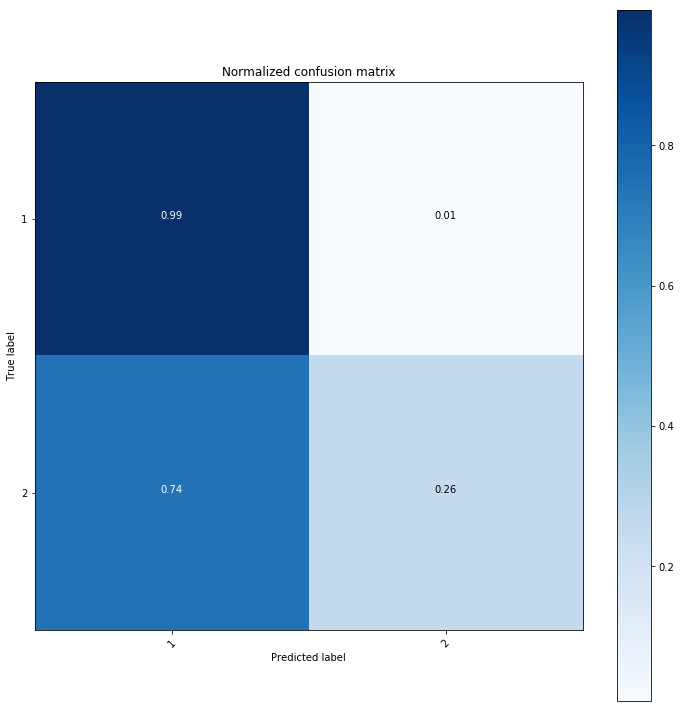

predicting 3 performance


100%|██████████| 609/609 [00:38<00:00, 16.00it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


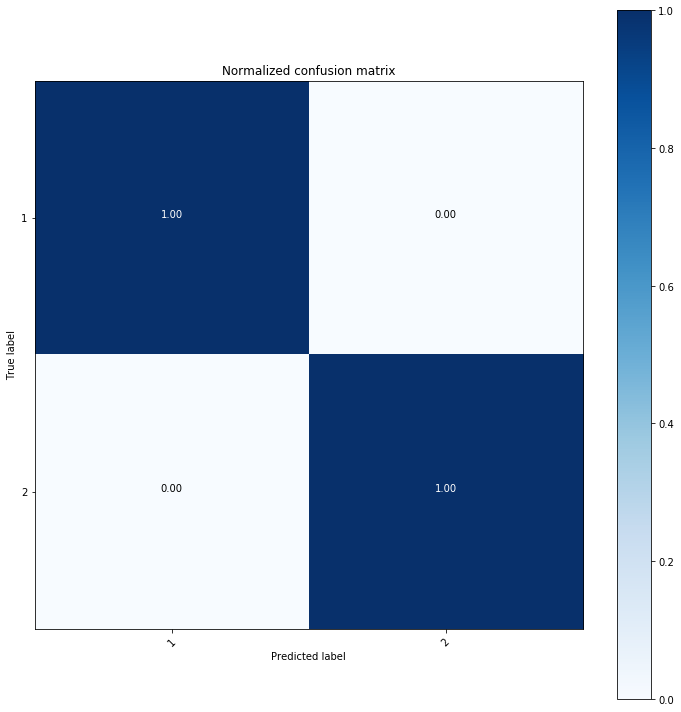

In [9]:
for k in [50]:
    for C in [100, 500]: 
        model = Model(k_centroid=k, tolerance=C)
        model.fit(pfs[TRAIN_ORDER - 1])
        print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
        for od in range(len(pfs)):
            print('predicting %d performance' % (od + 1))
            pred_y, y = model.predict(pfs[od])
            
            print('============ prediction arm ============')
            cutstom_output_cnf_matrix(y, pred_y)